#Kansas City House Prediction 
#Comparison of Regression Algorithms 

###Importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
plt.style.use('ggplot')

###Reading the dataset

In [0]:
kcdf = pd.read_csv('kc_house_data.csv')

In [0]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [0]:
kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###Checking for missing values

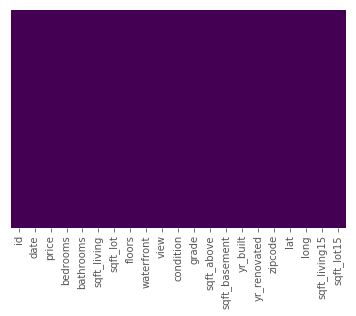

In [0]:
sns.heatmap(kcdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#EDA

###Analizing the target variable 'price'

In [0]:
kcdf['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

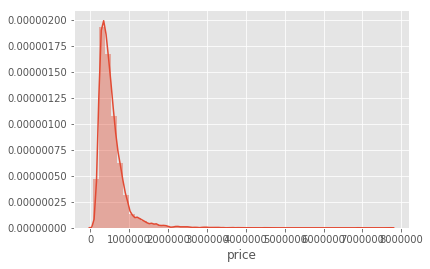

In [0]:
sns.distplot(kcdf['price'])

In [0]:
print ('Target variable skewness is: ', kcdf['price'].skew())

Target variable skewness is:  4.024069144684712


### Applying log transformation to normalize the target variable 'price'.

Log transformed target variable skewness is:  0.42807247557592526


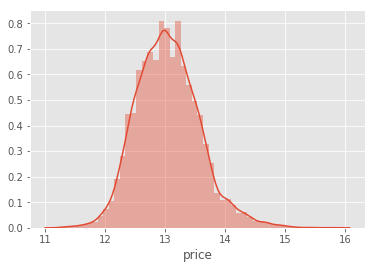

In [0]:
target=np.log(kcdf['price'])
print ('Log transformed target variable skewness is: ', target.skew())
sns.distplot(target)

### Loking for correlation between the features and the target variable, and between the features themselves 

In [0]:
kcdf.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

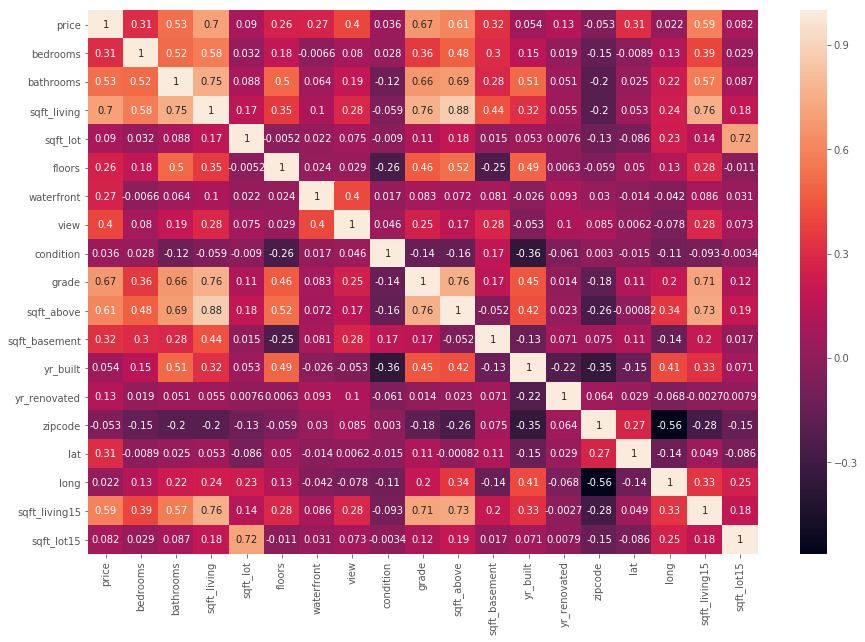

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(kcdf[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].corr(),annot=True)

In [0]:
corr=kcdf.corr()
print (corr.price.sort_values(ascending=False)[:10],'\n') # 10 most related features with price
print (corr.price.sort_values(ascending=True)[:10]) # 10 least related features with price

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64 

zipcode        -0.053203
id             -0.016762
long            0.021626
condition       0.036362
yr_built        0.054012
sqft_lot15      0.082447
sqft_lot        0.089661
yr_renovated    0.126434
floors          0.256794
waterfront      0.266369
Name: price, dtype: float64


In [0]:
corr=kcdf.corr()
print (corr.sqft_living.sort_values(ascending=False)[:5],'\n') # 5 most related features with price
print (corr.sqft_living.sort_values(ascending=True)[:5]) # 5 least related features with price

sqft_living      1.000000
sqft_above       0.876597
grade            0.762704
sqft_living15    0.756420
bathrooms        0.754665
Name: sqft_living, dtype: float64 

zipcode        -0.199430
condition      -0.058753
id             -0.012258
lat             0.052529
yr_renovated    0.055363
Name: sqft_living, dtype: float64


###To avoid multicollinearity, we will exclude:
 * 'sqft_living15'
 * 'sqft_above'
 * 'sqft_basement'

And as mean measurement we will keep 'sqft_living' which shows the highest linear relationship with the tartegt variable among the features of its kind. 

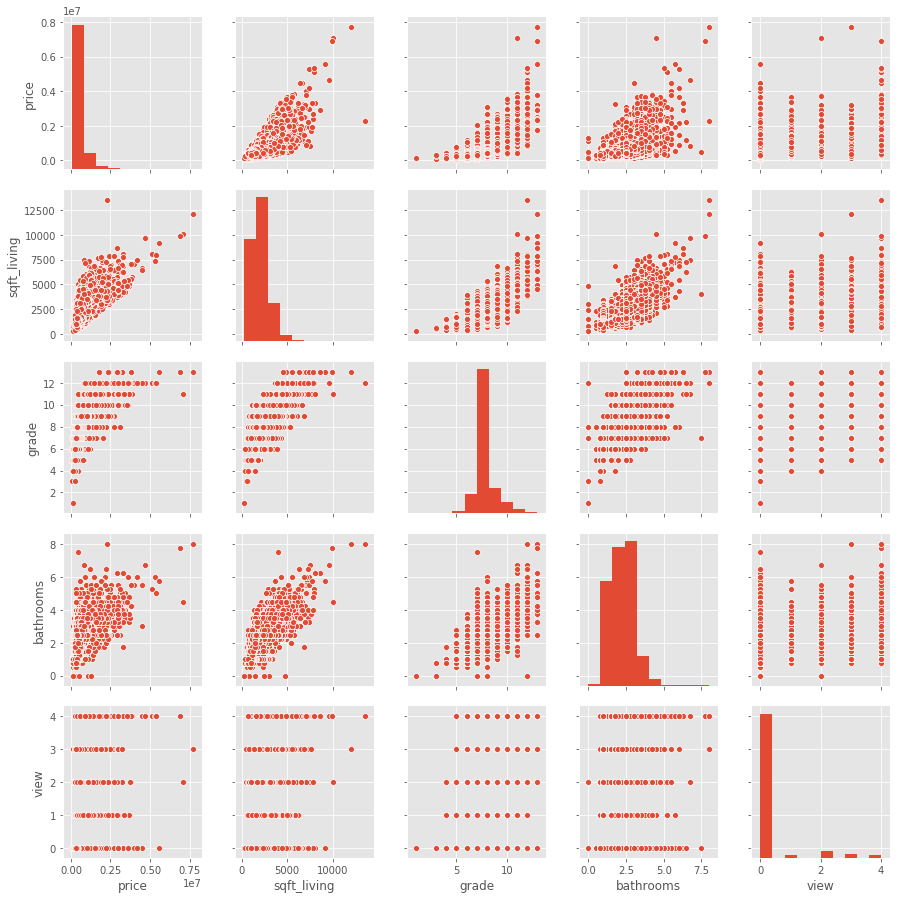

In [0]:
sns.pairplot(kcdf[['price','sqft_living','grade','bathrooms','view']])

#1. Implementing a Multiple Linear Regression Model

### Simple linear regression:

* The linear trend line:  
### $$y = b + wx  \ $$
and   
### $$w = \frac{ S_{xy}}{S_{xx} }\ \, $$  
###    $$b = \bar y - w\bar x $$  

### Multiple linear regression

* For more than one independant variables $(x_{1}, x_{2}, x_{3}, … .. x_{n}) $ and only one dependent variable y, this is called multiple linear regression(MLR). 
     
$$y  = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n}  + b $$


#### X and y arrays

In [0]:
X = kcdf[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_lot15']]
y = np.log(kcdf['price'])

###Train test split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###Creating and training the model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Model evaluation

In [0]:
print(lm.intercept_)

10.276506692255374


In [0]:
coeff_df = pd.DataFrame((lm.coef_*1000),X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-15.044936
bathrooms,68.589038
sqft_living,0.177993
sqft_lot,0.000420
floors,61.020001
waterfront,335.494063
view,70.202218
condition,58.630375
grade,177.418729
yr_built,-3.423698


###Predictions from our Model

In [0]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Multiple Linear Regression')

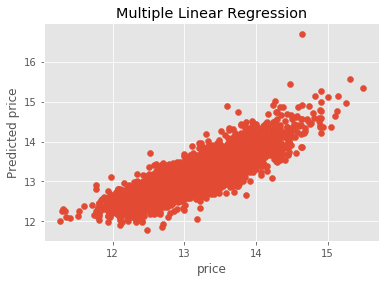

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("Multiple Linear Regression")

###Residuals histogram

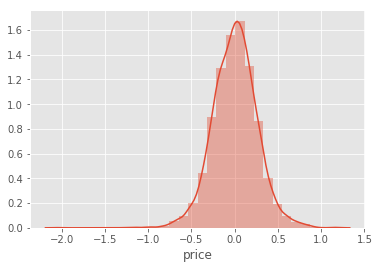

In [0]:
sns.distplot((y_test-predictions),bins=30);

## Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [0]:
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.19759657041537268
MSE: 0.06547927876587356
RMSE: 0.25588919235847685


### Claculating succes count for future comparison 

In [0]:
tolerance = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3,  0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
tolerance_df = pd.DataFrame(tolerance, columns=['Tolerance'])

tolerance_df['MLRSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'MLRSuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the Linear Regresion Model

In [0]:
OvError_MLR = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_MLR

2.515801473932521

#2. Implementing a Lasso Regression Model

Regularization or LASSO (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function. The penality term is:
$$
 p(w) = \alpha\sum_{i=1}^d |w_i| 
$$
  
   It shrinks the less important feature’s coefficient to zero. Thus, we can remove some features. 

In [0]:
from sklearn.linear_model import Lasso

In [0]:
lassom = Lasso(alpha=0.1)

In [0]:
lassom.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

###Predictions from our Model

In [0]:
predictions = lassom.predict(X_test)

Text(0.5, 1.0, 'Lasso Regression')

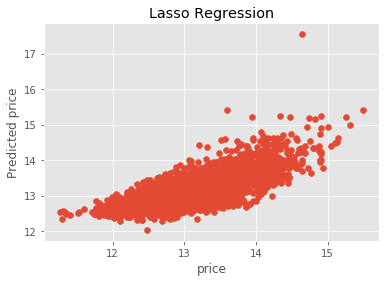

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("Lasso Regression")

###Residuals histogram

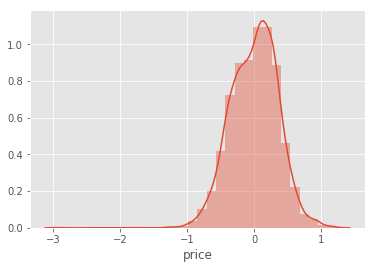

In [0]:
sns.distplot((y_test-predictions),bins=30);

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.28146189441836805
MSE: 0.12190744231885826
RMSE: 0.34915246285664125


###Claculating succes count for future comparison

In [0]:
tolerance_df['LassoSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'LassoSuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the Lasso Regression Model

In [0]:
OvError_Lasso = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_Lasso

4.871164807243355

#3. Implementing a Ridge Regression Model

Regularization or Ridge: adds “squared magnitude” of coefficient as penalty term to the loss function.
$$
𝑝(𝑤)=𝛽∑𝑖=1𝑑|𝑤𝑖|2 
$$
It is good for reducing the overfitting, and shrink less important coefficients.

In [0]:
from sklearn.linear_model import Ridge

In [0]:
ridgelm = Ridge(alpha=0.1,solver='lsqr')

In [0]:
ridgelm.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

###Predictions from our Model

In [0]:
predictions = ridgelm.predict(X_test)

Text(0.5, 1.0, 'Ridge Regression')

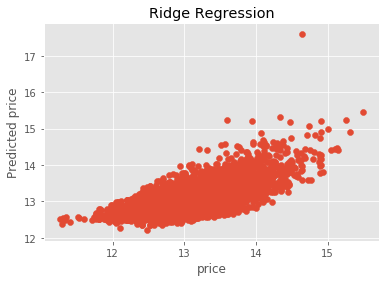

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("Ridge Regression")

###Residuals histogram

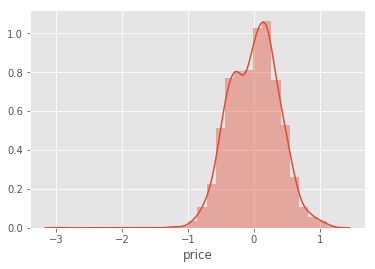

In [0]:
sns.distplot((y_test-predictions),bins=30);

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3033504161969109
MSE: 0.13964535203245393
RMSE: 0.37369151988298305


###Claculating succes count for future comparison

In [0]:
tolerance_df['RidgeSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'RidgeSuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the Ridge Regression Model

In [0]:
OvError_Ridge = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_Ridge

5.389415505825491

#4. Implementing a Polynomial Regression Model

Suppose we use the following polymonial equation to match the data:

$$ y = b + w_{1}*x + w_{2}x^{2} + .... + w_{d}x^{d} $$

Where d is the degree of the polynomial.

What we can do: transformation:  
$$   x  -> x_{1} $$  
$$   x^{2}  -> x_{2} $$  
$$ .......... $$  
$$   x^{d}  -> x_{d} $$  

Now the problem becomes a multi-linear regression problem:
$$ y = b + w_{1}*x_{1} + w_{2}x_{2} + .... + w_{d}x_{d} $$
  
  


In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(X_train)
poly_x_test = poly.fit_transform(X_test)

print(poly_x)

[[ 1.00000000e+00  3.00000000e+00  1.00000000e+00 ...  1.49582684e+04
  -1.05585043e+06  7.45286890e+07]
 [ 1.00000000e+00  3.00000000e+00  1.00000000e+00 ...  1.49736827e+04
  -9.84075414e+05  6.46737640e+07]
 [ 1.00000000e+00  4.00000000e+00  2.50000000e+00 ...  1.49494638e+04
  -9.75331836e+05  6.36325290e+07]
 ...
 [ 1.00000000e+00  3.00000000e+00  2.50000000e+00 ...  1.49355285e+04
  -1.08486705e+06  7.88011290e+07]
 [ 1.00000000e+00  4.00000000e+00  2.50000000e+00 ...  1.49035264e+04
  -1.27095046e+07  1.08384757e+10]
 [ 1.00000000e+00  3.00000000e+00  1.00000000e+00 ...  1.48830240e+04
  -8.78127208e+05  5.18112040e+07]]


In [0]:
polym = LinearRegression()
polym.fit(poly_x,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Predictions from our Model

In [0]:
predictions = polym.predict(poly_x_test)

Text(0.5, 1.0, 'Polynomial Regression')

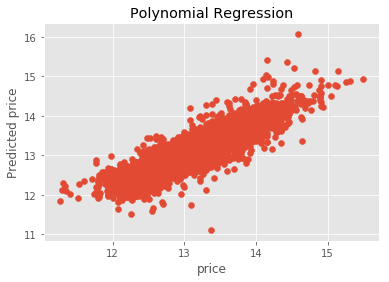

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("Polynomial Regression")

###Residuals histogram

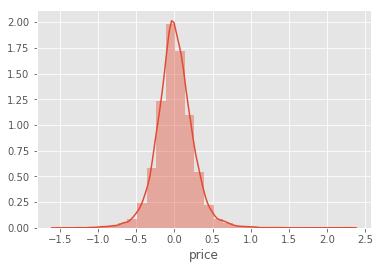

In [0]:
sns.distplot((y_test-predictions),bins=30);

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.17823461135160795
MSE: 0.05770551641972326
RMSE: 0.2402197252927479


###Claculating succes count for future comparison

In [0]:
tolerance_df['PolySuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'PolySuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the Polynomial Regression Model

In [0]:
OvError_Poly = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_Poly

2.204084913920291

#5. Implementing a Extreme Gradient Boosting (XGBoost) Regression Model

XGBoost is used for supervised learning problems, where we use the training data (with multiple features) 𝑥𝑖 to predict a target variable 𝑦𝑖

The task of training the model amounts to finding the best parameters 𝜃 that best fit the training data 𝑥𝑖 and labels 𝑦𝑖. In order to train the model, we need to define the objective function to measure how well the model fit the training data.

A salient characteristic of objective functions is that they consist two parts: training loss and regularization term:
$$
obj(𝜃)=𝐿(𝜃)+Ω(𝜃)
$$

where 𝐿 is the training loss function, and Ω is the regularization term. The training loss measures how predictive our model is with respect to the training data.

Having:

$$
obj^{(𝑡)} = \sum_{𝑖=1}^n[𝑔_𝑖 𝑓_𝑡(𝑥_𝑖)+ \frac 12 ℎ_𝑖{𝑓_𝑡}^2(𝑥_𝑖)]+Ω(𝑓_𝑡)
$$

where the 𝑔𝑖 and ℎ𝑖 are defined as:
$$
𝑔_𝑖=∂_{{𝑦̂_𝑖}^{(𝑡−1)}}𝑙(𝑦_𝑖,{𝑦̂_𝑖}^{(𝑡−1)})
$$

$$
ℎ_𝑖=∂^2_{{𝑦̂_𝑖}^{(𝑡−1)}}𝑙(𝑦_𝑖,{𝑦̂_𝑖}^{(𝑡−1)})
$$

And :

$$
Ω(𝑓_t)=𝛾𝑇+ \frac 12𝜆\sum_{𝑗=1}^𝑇{𝑤_𝑗}^2
 $$

In [0]:
import xgboost as xgb

In [0]:
xbgm = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.01, max_depth=4, min_child_weight=1.5, n_estimators=7200,                                                                 reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
xbgm.fit(X_train, y_train)
predictions = xbgm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


###Predictions from our Model

Text(0.5, 1.0, 'Xgboost Regression')

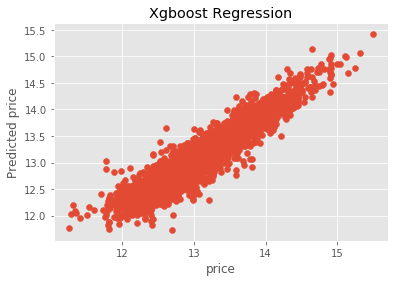

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("Xgboost Regression")

###Residuals histogram

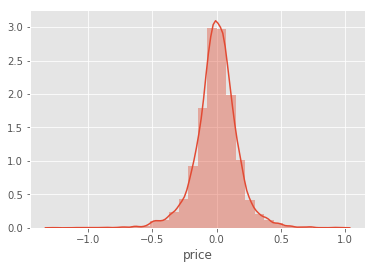

In [0]:
sns.distplot((y_test-predictions),bins=30);

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.1187041917629563
MSE: 0.02721047737657283
RMSE: 0.1649559861798681


###Claculating succes count for future comparison

In [0]:
tolerance_df['XgboostSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'XgboostSuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the Xgboost Regression Model

In [0]:
OvError_Xgboost = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_Xgboost

1.3031429966627694

#6. Implementing a ElasticNet Regression Model

Elastic Net Regularization: A combination of Lasso and Ridge:
    
$$
 p(w) = \alpha\sum_{i=1}^d |w_i| + \beta\sum_{i=1}^d |w_i|^2 
$$

In [0]:
from sklearn.linear_model import ElasticNet

In [0]:
elasticnetm = ElasticNet()

In [0]:
elasticnetm.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

###Predictions from our Model

In [0]:
predictions = elasticnetm.predict(X_test)

Text(0.5, 1.0, 'ElasticNet Regression')

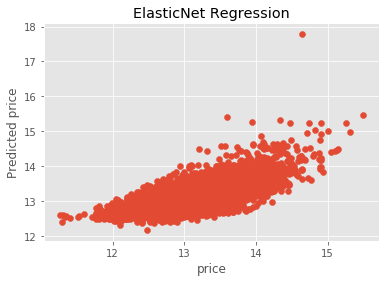

In [0]:
plt.scatter(y_test,predictions)
plt.xlabel("price")
plt.ylabel("Predicted price")
plt.title("ElasticNet Regression")

###Residuals histogram

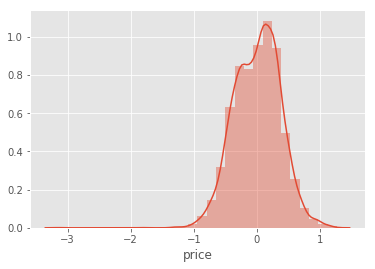

In [0]:
sns.distplot((y_test-predictions),bins=30);

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2955958955346367
MSE: 0.13316114327202874
RMSE: 0.3649125145456493


###Claculating succes count for future comparison

In [0]:
tolerance_df['ElasticNetSuccessCount'] = 0

#Calculating the tolerance 
for i in range(len(tolerance)):
    tolerance_df.loc[i,'ElasticNetSuccessCount'] = (((np.expm1(predictions)) >= (((1 - tolerance[i]) * np.expm1(y_test)))) & ((np.expm1(predictions)) <= ((1 + tolerance[i]) * np.expm1(y_test)))).sum()

###Calculating the accumulated percentage of errors for the ElasticNet Regression Model

In [0]:
OvError_ElasticNet = (sum((np.expm1(y_test))-(np.expm1(predictions)))/sum(np.expm1(y_test)))*100
OvError_ElasticNet

4.704176704494935

#Plotting the models performance on function of the tolerance

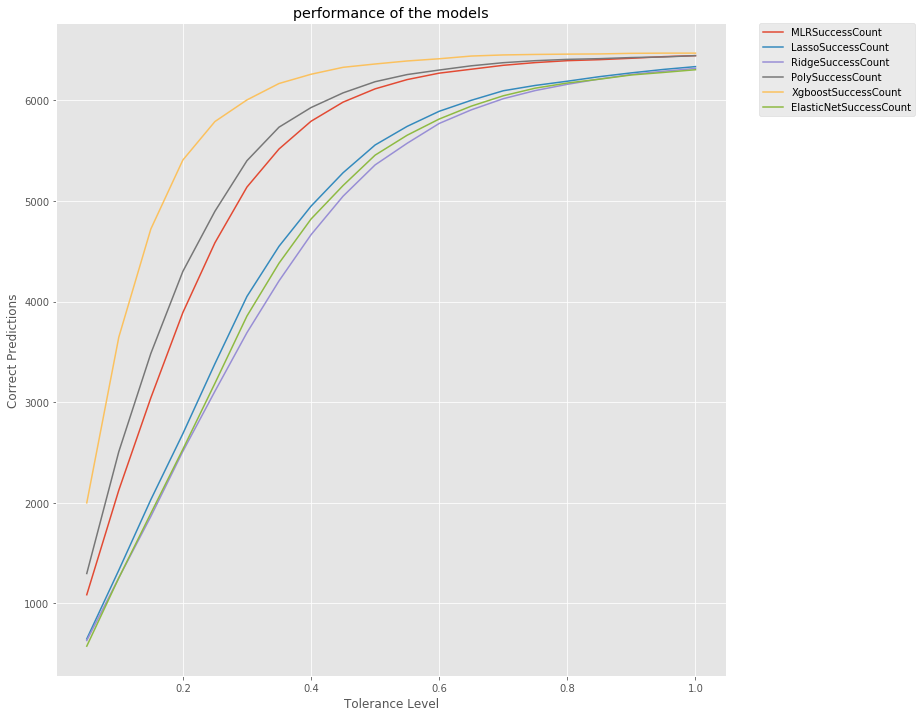

In [0]:
 fig = plt.figure(figsize=(12,12))

mlr = plt.plot(tolerance_df['Tolerance'], tolerance_df['MLRSuccessCount'], label='MLRSuccessCount')
lasso = plt.plot(tolerance_df['Tolerance'], tolerance_df['LassoSuccessCount'], label='LassoSuccessCount')
ridge = plt.plot(tolerance_df['Tolerance'], tolerance_df['RidgeSuccessCount'], label='RidgeSuccessCount')
poly = plt.plot(tolerance_df['Tolerance'], tolerance_df['PolySuccessCount'], label='PolySuccessCount')
xgboost = plt.plot(tolerance_df['Tolerance'], tolerance_df['XgboostSuccessCount'], label='XgboostSuccessCount')
elasticnet = plt.plot(tolerance_df['Tolerance'], tolerance_df['ElasticNetSuccessCount'], label='ElasticNetSuccessCount')
plt.ylabel('Correct Predictions')
plt.xlabel('Tolerance Level')
plt.title("performance of the models")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()